In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_2943/1011314280.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('/Users/mh/Desktop/Python/BostonHousing.csv')
data = data.dropna()
#Fit the linear Multi regression
X = data.drop(columns=['medv'])
y = data['medv']

In [3]:
#Split the data into 80%:20% Ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Use the 80% data to fit the regression function
model = LinearRegression()
model.fit(X_train, y_train)

#Use remaining 20% data for testing
y_pred = model.predict(X_test)

#Find the Squared R and MSE
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)



In [19]:
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const).fit()
p_values = model_sm.pvalues
print(p_values)

const      3.092856e-07
crim       2.299498e-02
zn         5.632636e-03
indus      5.545411e-01
chas       2.508356e-02
nox        1.097660e-03
rm         1.761068e-15
age        5.315739e-01
dis        4.491875e-09
rad        3.320536e-04
tax        7.895741e-03
ptratio    1.344847e-08
b          5.794927e-05
lstat      1.104328e-21
dtype: float64


In [20]:
# Remove variables with p-values > 0.005 (excluding 'const' column)
significant_features = p_values[p_values <= 0.005].index
if 'const' in significant_features:
    significant_features = significant_features.drop('const')

# Perform multi regression on remaining attributes
X_train_filtered = X_train[significant_features]
X_test_filtered = X_test[significant_features]

# Fit multi regression on filtered training data
model_filtered = sm.OLS(y_train, sm.add_constant(X_train_filtered)).fit()

# Calculate MSE and R-squared for filtered model
mse_filtered = mean_squared_error(y_test, model_filtered.predict(sm.add_constant(X_test_filtered)))
r_squared_filtered = model_filtered.rsquared


In [21]:
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train)

#Plot all MSE and Squared R line graph
mse_values = [mse, mean_squared_error(y_test, model_filtered.predict(X_test_filtered))]
r_squared_values = [r_squared, r2_score(y_test, model_filtered.predict(X_test_filtered))]

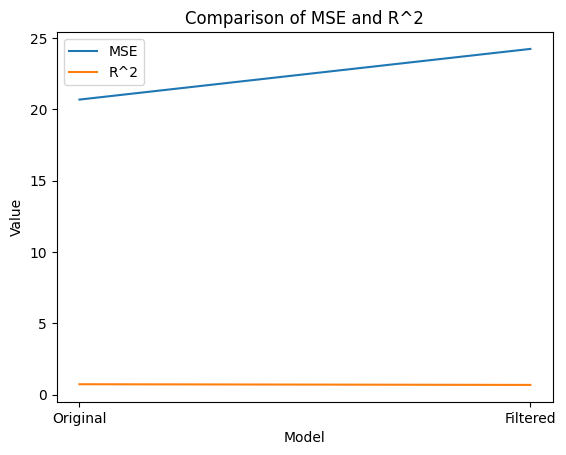

In [22]:
plt.plot(['Original', 'Filtered'], mse_values, label='MSE')
plt.plot(['Original', 'Filtered'], r_squared_values, label='R^2')
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Comparison of MSE and R^2')
plt.legend()
plt.show()